<a href="https://colab.research.google.com/github/GabrielFePL/Machine-Learning-Fatec-Matao/blob/main/ConsumeDataframeFromAPI_Exercise_20_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consumo de Dataframe de API

## Importação de Bibliotecas

In [86]:
!pip install plotly --upgrade
!pip install squarify --upgrade

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import requests

## Importação de Dataframe

In [95]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey=MLXRYWH4X4TY7YWA'

In [96]:
r = requests.get(url)
data = r.json()

In [97]:
time_series = data['Time Series (Daily)']
df = pd.DataFrame.from_dict(time_series, orient='index')
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [98]:
df.columns = ['open', 'high', 'low', 'close', 'volumn']
df = df.astype(float)

In [99]:
df

,open,high,low,close,volumn
1999-11-01,98.500,98.8100,96.37,96.75,9551800.0
1999-11-02,96.750,96.8100,93.69,94.81,11105400.0
1999-11-03,95.870,95.9400,93.50,94.37,10369100.0
1999-11-04,94.440,94.4400,90.00,91.56,16697600.0
1999-11-05,92.750,92.9400,90.19,90.25,13737600.0
...,...,...,...,...,...
2025-03-13,248.800,249.2700,243.04,245.80,3862416.0
2025-03-14,242.745,248.9499,241.68,248.35,4045284.0
2025-03-17,249.250,254.6300,249.00,252.97,3234149.0
2025-03-18,252.510,252.5700,245.12,246.95,4172239.0


## Adição de Classificação de Tendência

In [102]:
df['tendency'] = df['close'].diff().shift(-1)
df['tendency'] = df['tendency'].apply(lambda x: 'up' if x > 0 else 'down')
df

,open,high,low,close,volumn,tendency
1999-11-01,98.500,98.8100,96.37,96.75,9551800.0,down
1999-11-02,96.750,96.8100,93.69,94.81,11105400.0,down
1999-11-03,95.870,95.9400,93.50,94.37,10369100.0,down
1999-11-04,94.440,94.4400,90.00,91.56,16697600.0,down
1999-11-05,92.750,92.9400,90.19,90.25,13737600.0,up
...,...,...,...,...,...,...
2025-03-13,248.800,249.2700,243.04,245.80,3862416.0,up
2025-03-14,242.745,248.9499,241.68,248.35,4045284.0,up
2025-03-17,249.250,254.6300,249.00,252.97,3234149.0,down
2025-03-18,252.510,252.5700,245.12,246.95,4172239.0,up


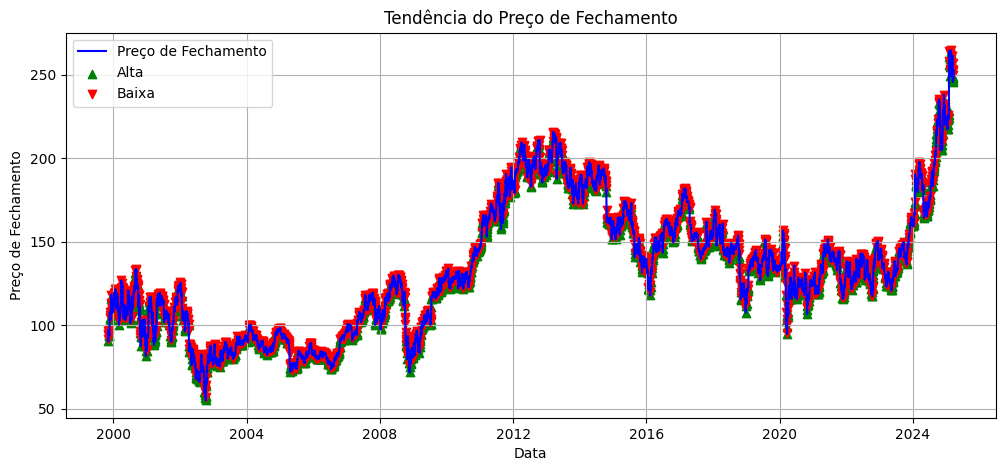

In [101]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['close'], label='Preço de Fechamento', color='blue')
plt.scatter(df[df['tendency'] == 'up'].index, df[df['tendency'] == 'up']['close'], color='green', label='Alta', marker='^')
plt.scatter(df[df['tendency'] == 'down'].index, df[df['tendency'] == 'down']['close'], color='red', label='Baixa', marker='v')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Tendência do Preço de Fechamento')
plt.legend()
plt.grid()
plt.show()